# Tips Dataset
The Tips dataset contains information about tips received by waitstaff in a restaurant.
It’s commonly used for regression and exploratory data analysis (EDA). 
    The dataset includes features such as total bill amount, tip amount, gender of the person paying the bill, whether the person is a smoker, day of the week, time of day, and size of the party.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=sns.load_dataset('tips')

In [6]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Feature Description of Dataset

* total_bill: Total bill amount (numerical)
* tip: Tip amount (numerical)
* sex: Gender of the person paying the bill (categorical)
* smoker: Whether the person is a smoker (categorical)
* day: Day of the week (categorical)
* time: Time of day (Lunch/Dinner) (categorical)
* size: Size of the party (numerical)

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [10]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


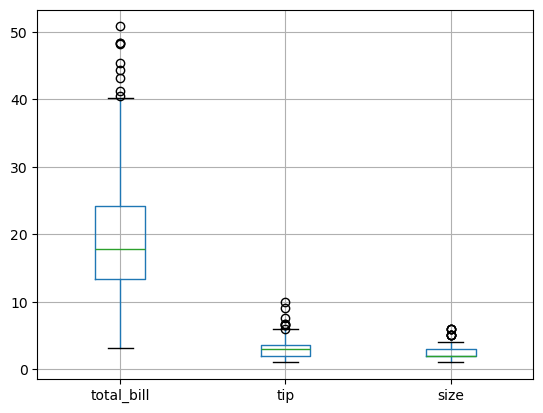

In [11]:
df.boxplot()
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 9.1 KB


In [13]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [14]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [15]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5], dtype=int64)

In [16]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

## Distribution of Smoking Habit

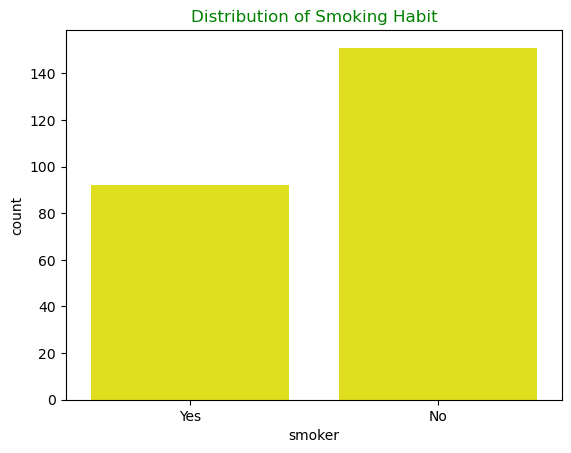

In [17]:
plt.title('Distribution of Smoking Habit',color='g')
sns.countplot(x=df['smoker'],color='yellow')
plt.show()

### Non-Smokers Outnumber Smokers: 
The count of non-smokers is significantly higher than that of smokers.

## Gender Wise Classification

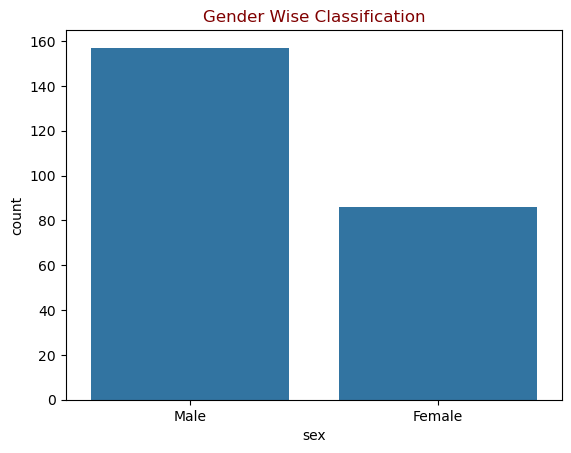

In [18]:
plt.title('Gender Wise Classification',color='maroon')
sns.countplot(x=df['sex'])
plt.show()

Male category is mostly payed the bills in restaurent.


## Distribution of Smokers and Non-Smokers by Gender

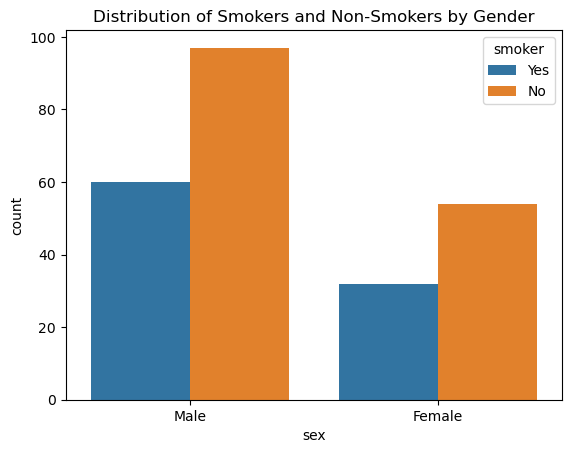

In [19]:
plt.title('Distribution of Smokers and Non-Smokers by Gender')
sns.countplot(x=df['sex'],hue=df['smoker'])
plt.show()

 There are more male smokers compared to female smokers, 
and more female non-smokers compared to male non-smokers.

## Comparison of Average Tip Amounts by Gender

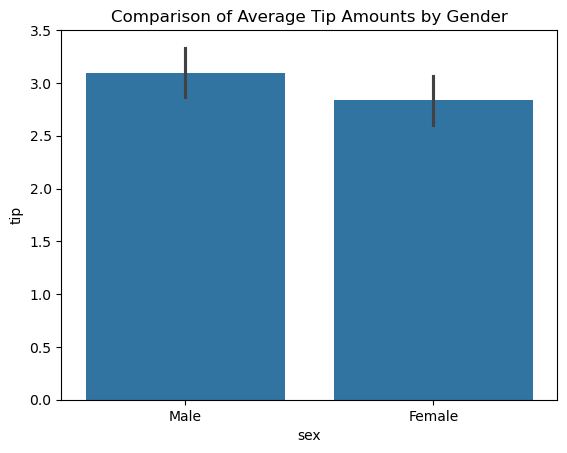

In [20]:
plt.title('Comparison of Average Tip Amounts by Gender')
sns.barplot(x='sex',y='tip',data=df)
plt.show()

### Similar Average Tips: 
Both males and females give similar average tips, with males tipping slightly higher.
### Consumer Behavior:
This suggests that gender does not play a major role in tipping behavior

## Comparison of Average Tips for Time

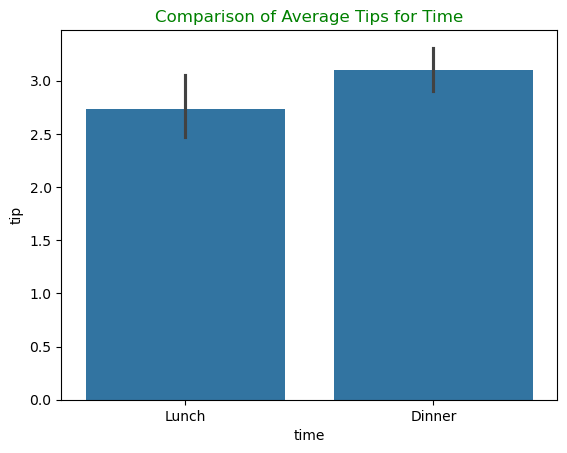

In [21]:
plt.title('Comparison of Average Tips for Time',color='g')
sns.barplot(x='time',y='tip',data=df)
plt.show()

### Higher Tips at Dinner: 
The average tip given during dinner is higher than that during lunch.

## Comparison of Average Tip by Gender and Meal Time

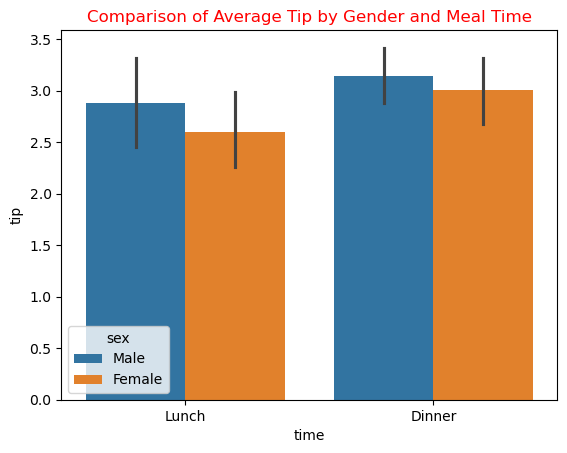

In [22]:
plt.title('Comparison of Average Tip by Gender and Meal Time',color='r')
sns.barplot(x='time',y='tip',data=df,hue='sex')
plt.show()

### Higher Tips by Males: 
On average, males give higher tips than females during both lunch and dinner.
### Larger Difference at Lunch: 
The difference in average tips between males and females is more pronounced during lunch compared to dinner.

## Comparison of Average Daily Tips for Time

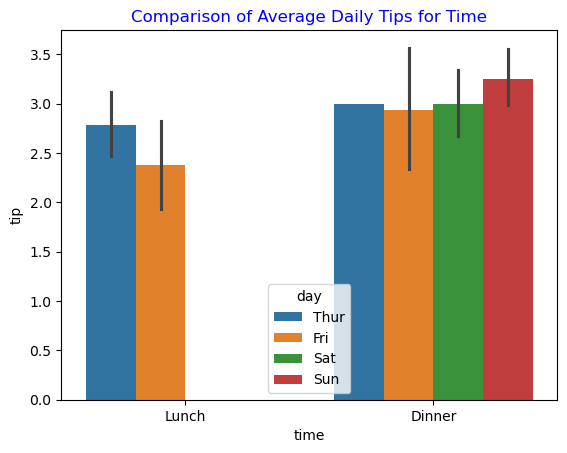

In [23]:
plt.title('Comparison of Average Daily Tips for Time',color='b')
sns.barplot(x='time',y='tip',data=df,hue='day')
plt.show()


### Dinner Tips Higher: 
Dinner consistently generates higher average tips than lunch across all four days.
### Sunday Peak: 
Sunday dinner shows the highest average tip amount compared to other days.

## Trend of Average Daily Tips

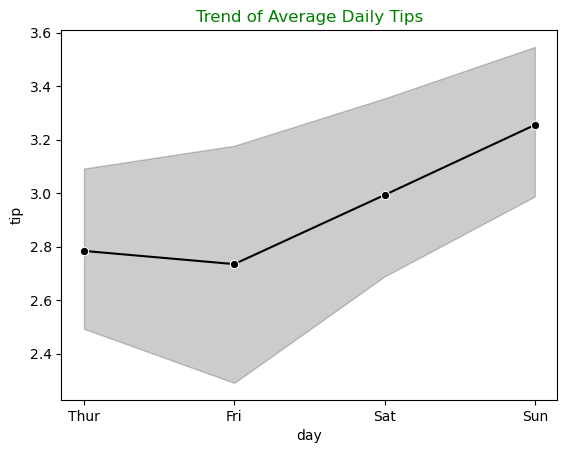

In [24]:
plt.title('Trend of Average Daily Tips',color='g')
sns.lineplot(x='day',y='tip',data=df,marker='o',color='black')
plt.show()

## Increasing Trend: 
The average tip amount shows an upward trend from Thursday to Sunday.

## Average Daily Tips by Gender

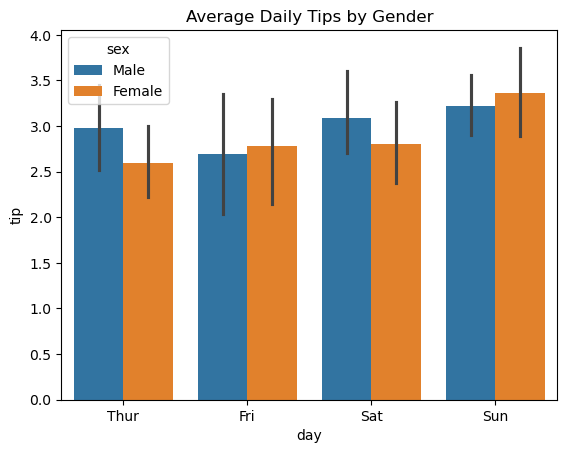

In [25]:
plt.title('Average Daily Tips by Gender',color='black')
sns.barplot(x='day',y='tip',data=df,hue='sex')
plt.show()


### Similar Tip Range: 
Both males and females receive a similar range of tips across the days.
### Highest Tips on Sunday: 
The highest average tips for both genders are on Sunday.
### No Clear Gender Advantage: 
There is no clear pattern showing one gender consistently receiving higher tips than the other.er.

## Weekly Sales Trend Analysis

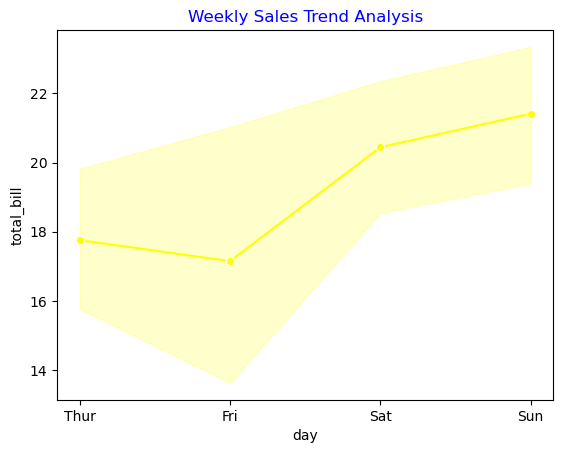

In [26]:
plt.title('Weekly Sales Trend Analysis',color='blue')
sns.lineplot(x='day',y='total_bill',data=df,marker='o',color='yellow')
plt.show()

## Increasing Trend: 
The total bill amount shows an upward trend from Thursday to Sunday.
## Peak on Sunday: 
The highest total bill amount is observed on Sunday, indicating a possible increase in consumer spending towards the weekend.
## Lowest on friday: 
The lowest total bill amount is observed on friday.

## Comparison of Average Tips Given by Smokers vs Non-Smokers

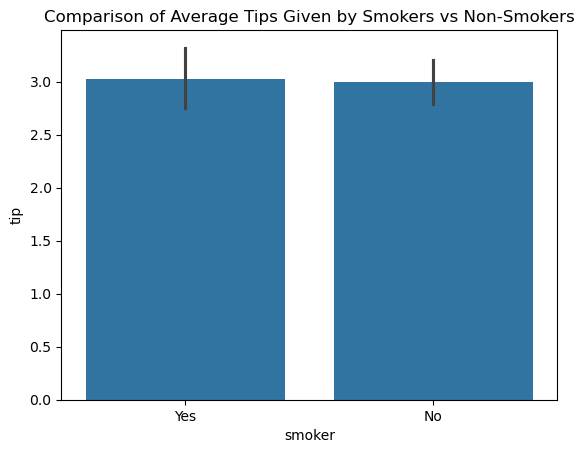

In [27]:
plt.title('Comparison of Average Tips Given by Smokers vs Non-Smokers')
sns.barplot(x='smoker',y='tip',data=df)
plt.show()

### Similar Average Tips: 
Both smokers and non-smokers give similar average tip amounts, as indicated by the nearly equal height of the bars.

## Party Size Distribution

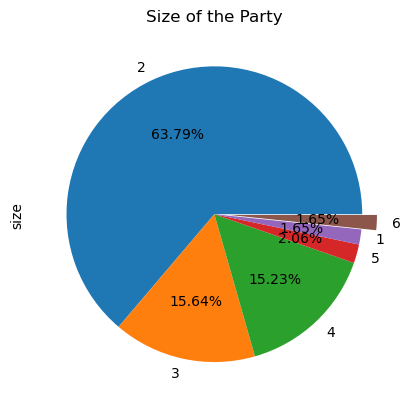

In [28]:
df['size'].value_counts().plot(kind='pie',title='Size of the Party',explode=(0,0,0,0,0,0.1),label='size',autopct='%1.2f%%')
plt.show()

### Dominance of Party Size 2: 
The largest segment, representing a party size of 2, constitutes 63.79% of the total.
### Smaller Groups: 
Larger party sizes (4, 5, and 6) are much less common, each making up a small percentage of the total.

## Total Bill Amount by Group Size

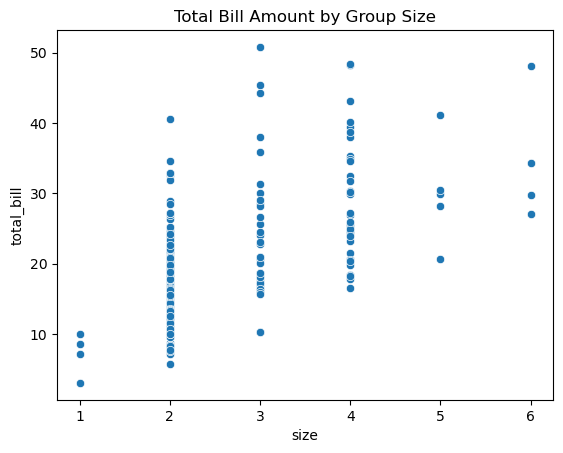

In [29]:
plt.title('Total Bill Amount by Group Size')
sns.scatterplot(x='size',y='total_bill',data=df)
plt.show()

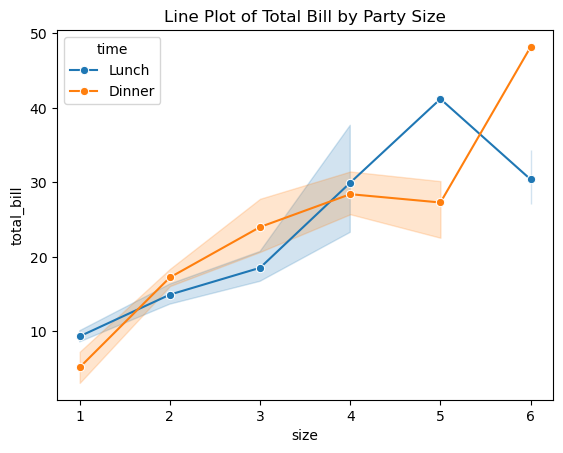

In [47]:
sns.lineplot(x='size', y='total_bill', data=df, hue='time', marker='o')
plt.title("Line Plot of Total Bill by Party Size")
plt.show()

### Increasing Trend: 
The total bill amount tends to increase with the group size.
### Common Group Sizes: 
The largest concentration of data points occurs at sizes 2 and 3, indicating these are common group sizes.

## Distribution of Columns

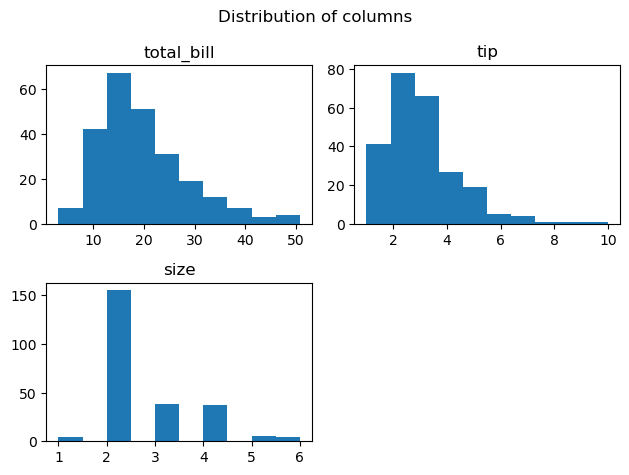

In [30]:
df.hist(grid=False)
plt.suptitle('Distribution of columns')
plt.tight_layout()
plt.show()

## Pair plot

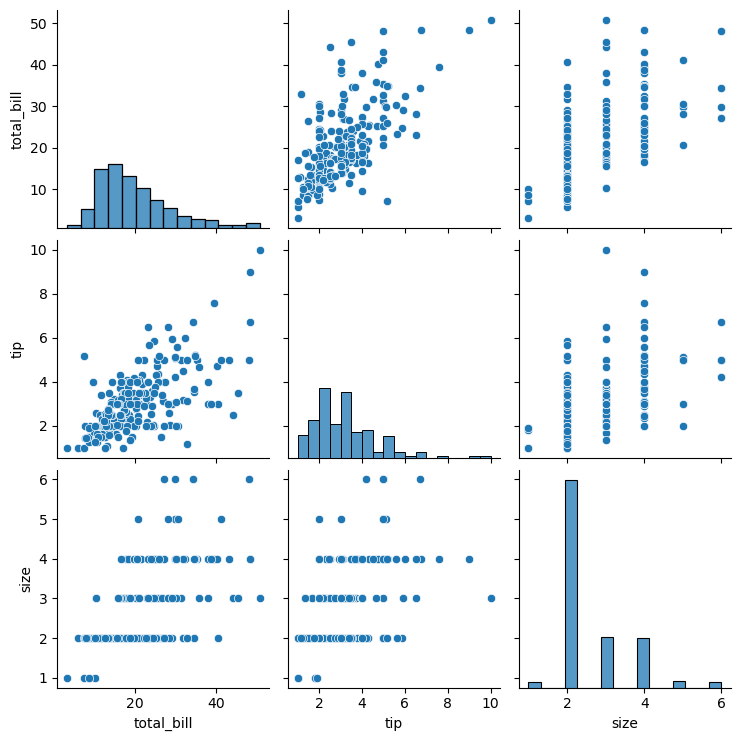

In [31]:
sns.pairplot(df)
plt.show()

In [32]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

## joint plot

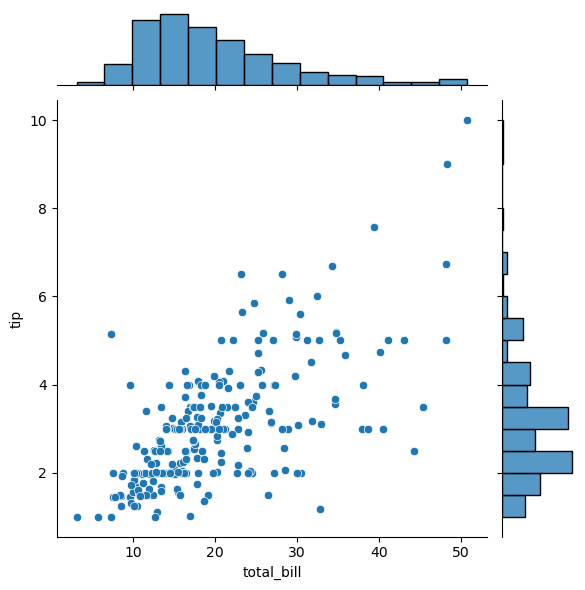

In [33]:
sns.jointplot(x='total_bill',y='tip',data=df,kind='scatter')
plt.show()

## Facet Grid

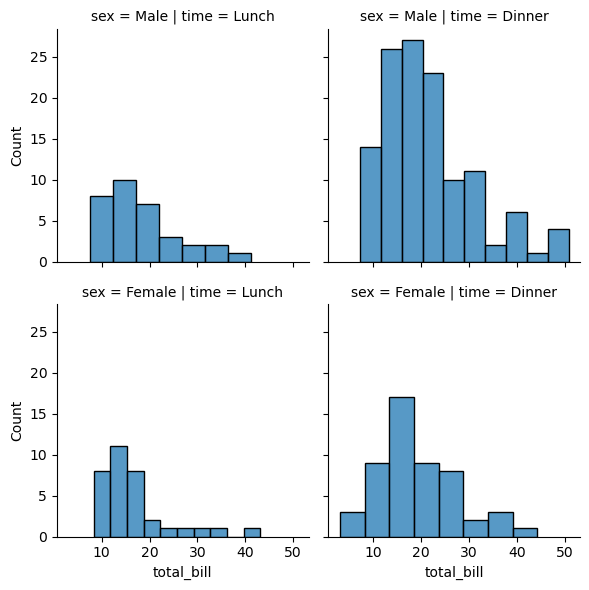

In [34]:
g=sns.FacetGrid(df,col='time',row='sex')
g.map(sns.histplot,'total_bill')
plt.show()

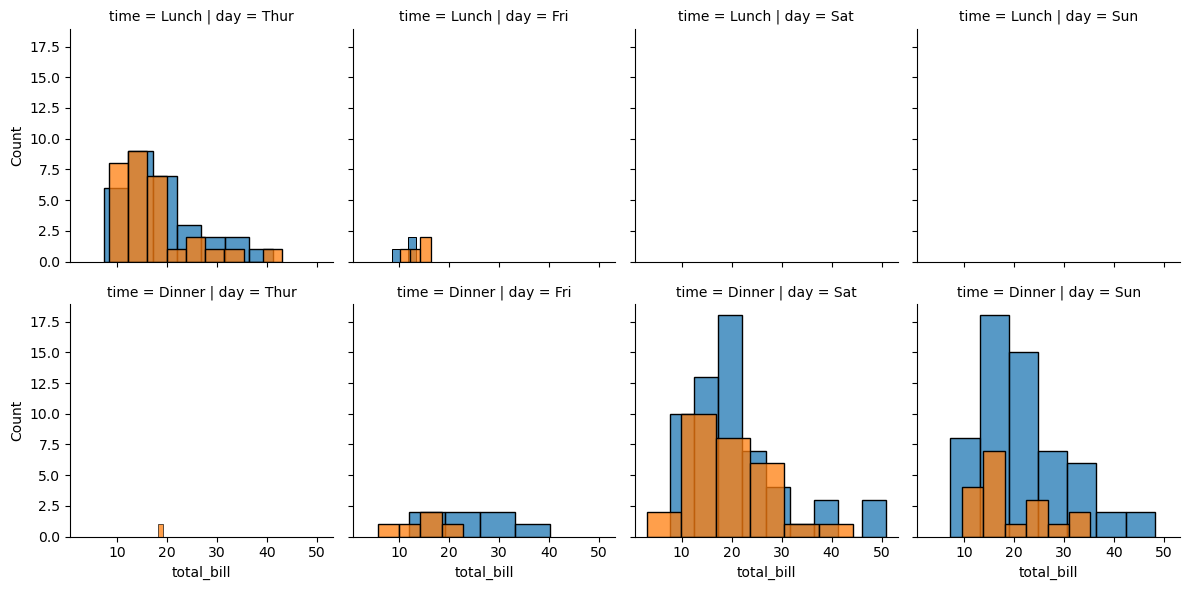

In [35]:
g=sns.FacetGrid(df,col='day',row='time',hue='sex')
g.map(sns.histplot,'total_bill')
plt.show()

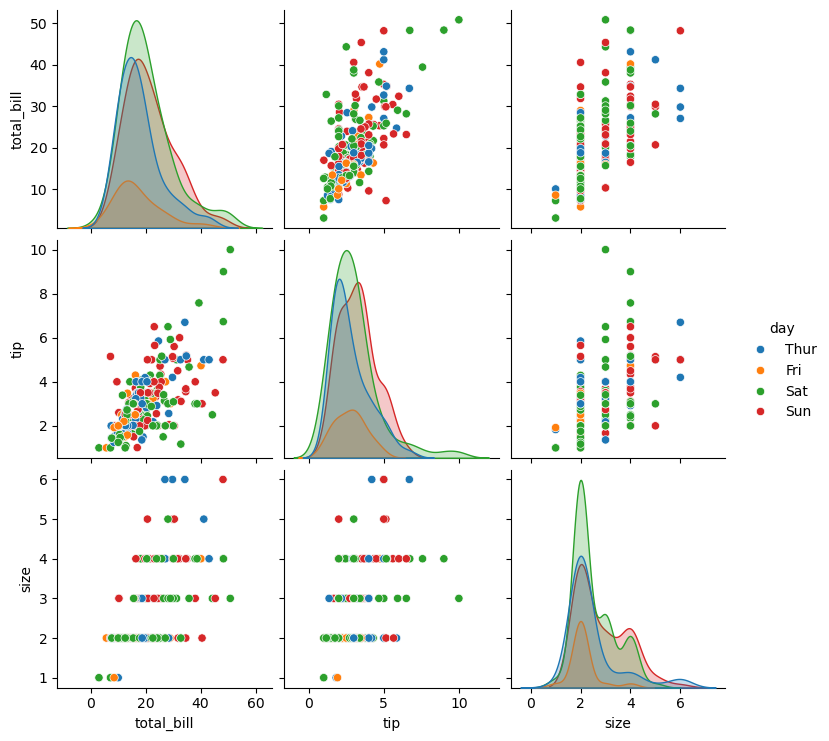

In [36]:
sns.pairplot(df,hue='day')
plt.show()

In [37]:
data=df.pivot_table(index='day',columns='time',values='total_bill',aggfunc='mean')
data

time,Lunch,Dinner
day,,
Thur,17.742500,18.780000
Fri,12.845714,19.663333
Sat,NaN,20.441379
Sun,NaN,21.410000


## Average Total Bill Heatmap by Day and Time

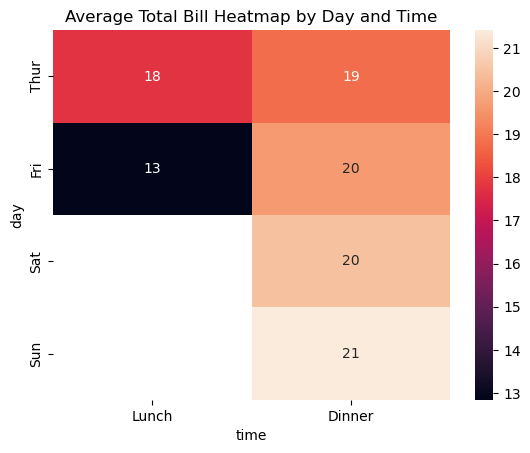

In [38]:
sns.heatmap(data,annot=True)
plt.title('Average Total Bill Heatmap by Day and Time')
plt.show()

### Highest Spending: 
Saturday Dinner has the highest average bill at 21.
### Lowest Spending: 
Friday Lunch has the lowest average bill at 13.
### Dinner vs. Lunch: 
Generally, Dinner times have higher average bills compared to Lunch times.
### Day Comparison: 
Saturday and Friday show higher average bills compared to Thursday.

## Violin Plot

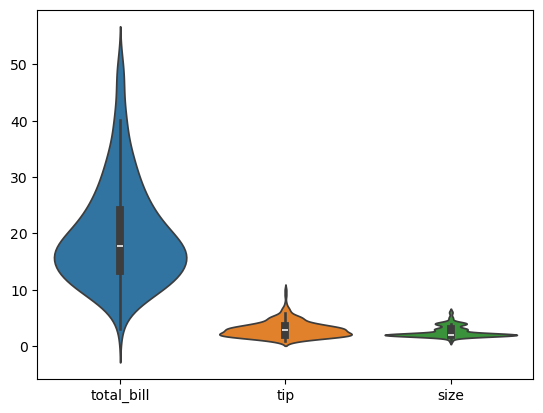

In [39]:
sns.violinplot(df)
plt.show()

In [40]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

## Relationship Between Group Size and Tip Amount

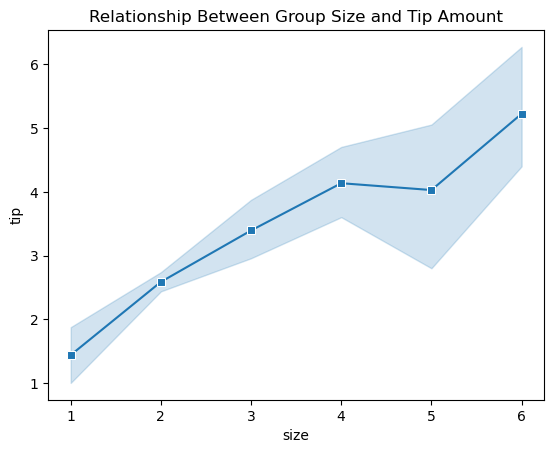

In [41]:
sns.lineplot(x='size',y='tip',data=df,marker='s')
plt.title('Relationship Between Group Size and Tip Amount')
plt.show()

### Positive Correlation: 
As the group size increases, the tip amount tends to increase as well.
### Trend Consistency: 
The upward trend is consistent, but the variability suggests other factors might influence the tip amount beyond just group size.

## Correlation Matrix

In [42]:
corr = df[['total_bill', 'tip', 'size']].corr()

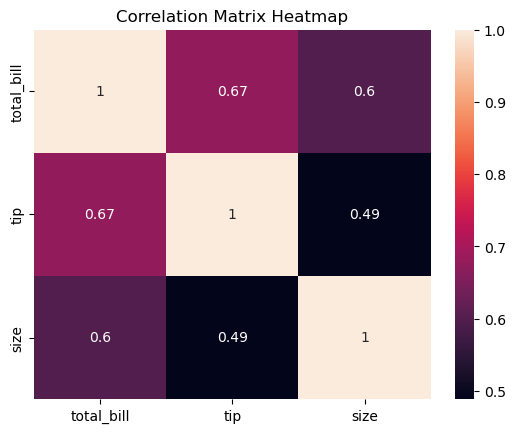

In [43]:
sns.heatmap(corr,annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

## Explanation:

* Heatmap: Displays matrix data with color intensities representing values.
* Scatter Plot: Shows how two continuous variables relate to each other.
* Line Plot: Illustrates trends over a continuous variable.
* Bar Plot: Compares average values of a numerical variable across categories.
* Box Plot: Visualizes the distribution and outliers of a numerical variable by category.
* Violin Plot: Combines box plot features with a density plot to show the distribution of data.
* Pair Plot: Provides a grid of scatter plots and histograms to explore relationships between multiple variables.
* Count Plot: Shows the frequency of observations within each category.
* Joint Plot: Combines scatter plots with histograms or KDE plots for detailed relationships between two variables.
* Facet Grid: Creates multiple plots for different subsets of the data, facilitating comparison across categories.
